# GIẢ THUYẾT: Tốc độ gió ở độ cao 10m mạnh hơn ở độ cao 100m.

In [51]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [52]:
weather_df = pd.read_csv("final_data/weather_history.csv")

In [53]:
weather_df.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,capital,country
0,2023-01-01 00:00:00,24.817001,87.862100,22.667000,29.228237,0.0,0.0,0.0,0.0,0.0,...,23.017000,26.867,26.567001,26.117,0.265,0.303,0.356,0.376,Abidjan,Ivory Coast
1,2023-01-01 01:00:00,24.017000,91.894440,22.617000,28.590828,0.0,0.0,0.0,0.0,0.0,...,22.817001,26.617,26.567001,26.117,0.266,0.303,0.356,0.376,Abidjan,Ivory Coast
2,2023-01-01 02:00:00,21.417000,97.876366,21.067001,25.501945,0.0,0.0,0.0,0.0,0.0,...,22.617000,26.367,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast
3,2023-01-01 03:00:00,21.267000,99.693840,21.217001,25.291786,0.0,0.0,0.0,0.0,3.0,...,22.767000,26.117,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast
4,2023-01-01 04:00:00,21.167000,100.000000,21.167000,24.795946,0.0,0.0,0.0,0.0,3.0,...,22.917000,25.917,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast


In [7]:
weather_df[["wind_speed_10m", "wind_speed_100m"]]

,wind_speed_10m,wind_speed_100m
0,6.109403,9.366919
1,4.802999,8.311245
2,2.276840,3.893995
3,3.240000,0.720000
4,5.771239,2.620839
...,...,...
1690675,6.489992,20.240198
1690676,10.383987,26.712873
1690677,15.188417,31.452133
1690678,16.516901,32.535713


In [36]:
wind_10m = weather_df["wind_speed_10m"]
wind_100m = weather_df["wind_speed_100m"]
wind_direction_10m = weather_df["wind_direction_10m"]
wind_direction_100m = weather_df["wind_direction_100m"]

In [22]:
wind_10m.mean()

11.337591283904226

In [23]:
wind_100m.mean()

16.990917600352404

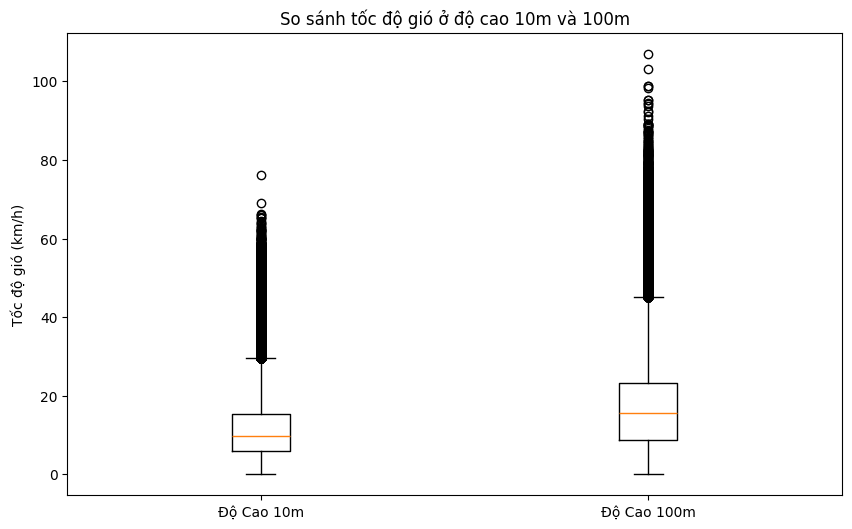

In [25]:
# Biểu đồ boxplot để so sánh phân phối giữa độ cao 10m và 100m
plt.figure(figsize=(10, 6))
plt.boxplot([wind_10m, wind_100m], labels=['Độ Cao 10m', 'Độ Cao 100m'])
plt.title('So sánh tốc độ gió ở độ cao 10m và 100m')
plt.ylabel('Tốc độ gió (km/h)')
plt.show()

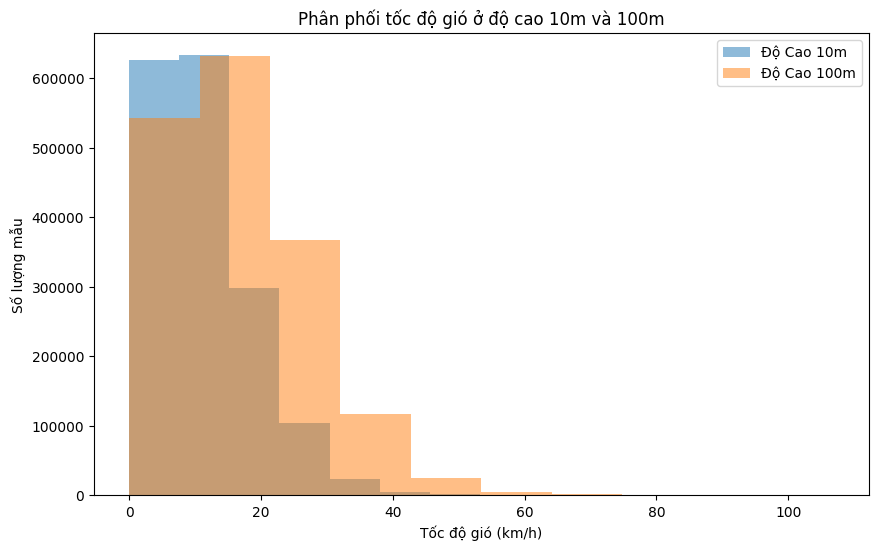

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(wind_10m, alpha=0.5, label='Độ Cao 10m')
plt.hist(wind_100m, alpha=0.5, label='Độ Cao 100m')
plt.title('Phân phối tốc độ gió ở độ cao 10m và 100m')
plt.xlabel('Tốc độ gió (km/h)')
plt.ylabel('Số lượng mẫu')
plt.legend()
plt.show()

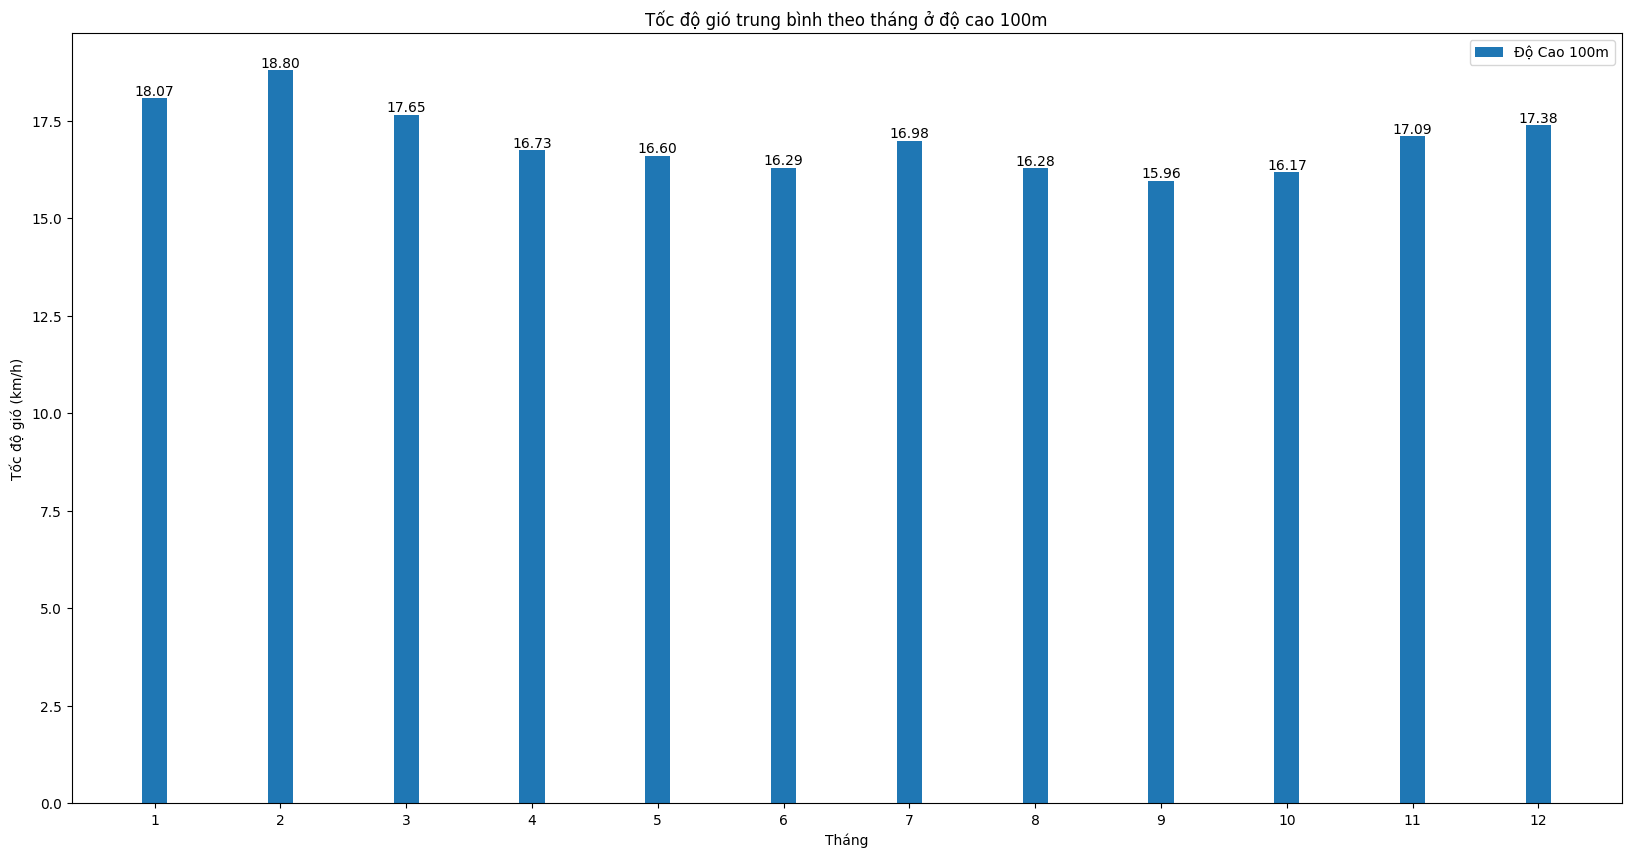

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weather_df, wind_speed_10m, and wind_speed_100m are defined

# group by session based on date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month

# group
wind_100m_group = weather_df.groupby('month')['wind_speed_100m']

# Calculate means
mean_100m = wind_100m_group.mean()

# Sort the DataFrame by month
mean_100m = mean_100m.sort_index()

# Define the positions for each month
positions = range(1, len(mean_100m) * 2, 2)

# Plotting using bar plot
plt.figure(figsize=(20, 10))
bars = plt.bar([pos for pos in positions], mean_100m, width=0.4, label='Độ Cao 100m', align='center')

# Set x-axis ticks and labels
plt.xticks([pos for pos in positions], mean_100m.index)

# Add labels on top of each bar
for bar, value in zip(bars, mean_100m):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.title('Tốc độ gió trung bình theo tháng ở độ cao 100m')
plt.xlabel('Tháng')
plt.ylabel('Tốc độ gió (km/h)')
plt.legend()
plt.show()


c:\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


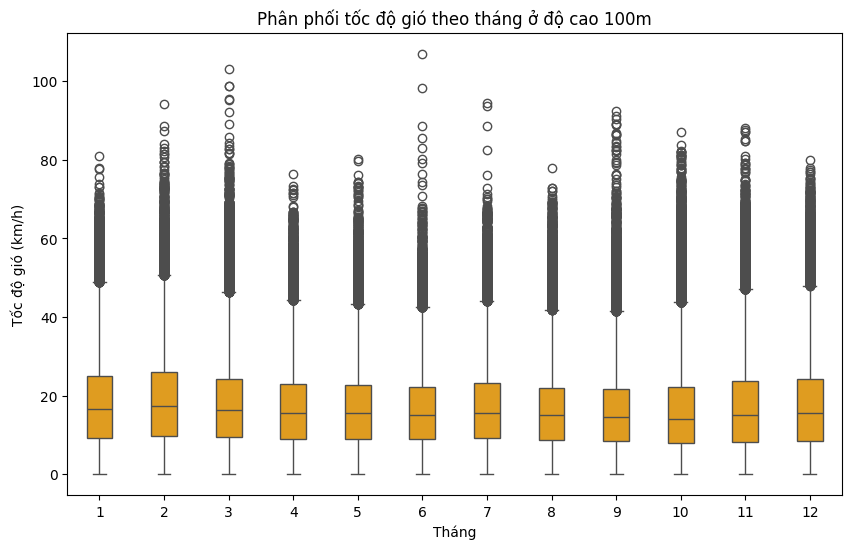

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group by session based on date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Month': weather_df['month'],
    'Độ Cao 100m': weather_df['wind_speed_100m'],
})

# Plotting using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Độ Cao 100m', data=plot_data, color='orange', width=0.4)

plt.title('Phân phối tốc độ gió theo tháng ở độ cao 100m')
plt.xlabel('Tháng')
plt.ylabel('Tốc độ gió (km/h)')
plt.show()


In [80]:
weather_df["wind_speed_100m"]

0           9.366919
1           8.311245
2           3.893995
3           0.720000
4           2.620839
             ...    
1690675    20.240198
1690676    26.712873
1690677    31.452133
1690678    32.535713
1690679    32.449963
Name: wind_speed_100m, Length: 1690680, dtype: float64

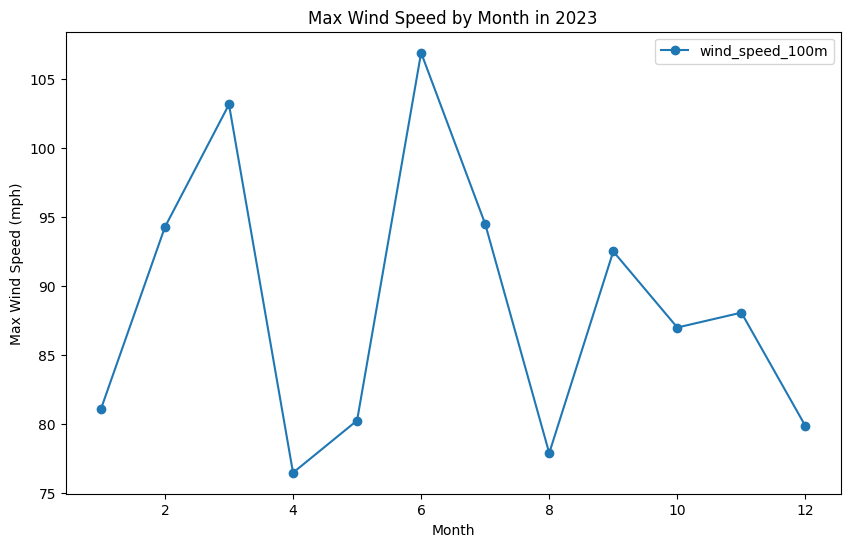

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# group by session based on date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month

# Chuyển đổi cột 'date' sang định dạng datetime và tạo cột 'month'
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month

# Tìm tốc độ gió cao nhất theo từng tháng
max_wind_speed_by_month = weather_df.groupby('month')['wind_speed_100m'].max().reset_index()

# Bước 2: Biểu đồ đường
max_wind_speed_by_month.plot(x='month', y='wind_speed_100m', kind='line', marker='o', figsize=(10, 6))
plt.title('Max Wind Speed by Month in 2023')
plt.ylabel('Max Wind Speed (mph)')
plt.xlabel('Month')
plt.show()

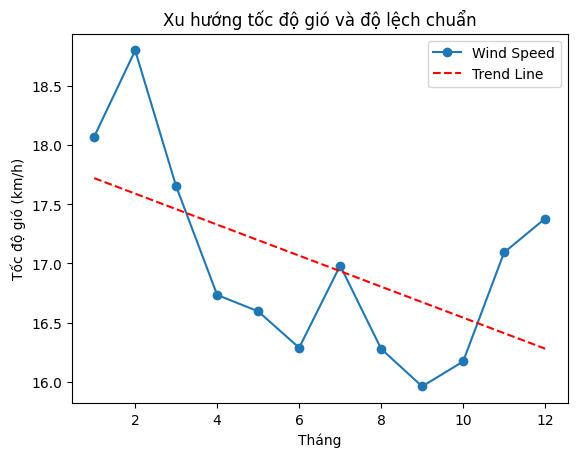

Trend Line Coefficient (Slope): -0.13095383739968985
Standard Deviation: 0.8160600945642814


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của dữ liệu tốc độ gió theo tháng
# Thay thế đoạn mã sau đây với dữ liệu thực tế của bạn
df = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Wind_Speed': weather_df.groupby('month')['wind_speed_100m'].mean().reset_index()['wind_speed_100m'],
})

# step 1: Trend Line
coefficients = np.polyfit(df['Month'], df['Wind_Speed'], 1)
trend_line = np.poly1d(coefficients)

# step 2: Standard Deviation
std_deviation = np.std(df['Wind_Speed'])

# step 3: Plotting
plt.plot(df['Month'], df['Wind_Speed'], marker='o', label='Wind Speed')
plt.plot(df['Month'], trend_line(df['Month']), label='Trend Line', linestyle='--', color='red')
plt.title('Xu hướng tốc độ gió và độ lệch chuẩn')
plt.xlabel('Tháng')
plt.ylabel('Tốc độ gió (km/h)')
plt.legend()
plt.show()

# Step 4: In the trend line coefficient and standard deviatio
print(f'Trend Line Coefficient (Slope): {coefficients[0]}')
print(f'Standard Deviation: {std_deviation}')
